In [304]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [108]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [184]:
## With Pandas
import pandas as pd

In [246]:
#########################
## Pandas Fundamentals ##
#########################
## Creating dataframe
data = {
    "A": [1, 2, np.nan, 4, 5],
    "B": [1, 2, 3, 4, 5],
    "C": ["a", "b", "c", "d", "a"],
}

df = pd.DataFrame(data, index = ["a", "b", "c", "d", "e"])
df

,A,B,C
a,1.0,1,a
b,2.0,2,b
c,NaN,3,c
d,4.0,4,d
e,5.0,5,a


In [248]:
## Indexing
df["A"].iloc[2] # iloc for integer location 
df["B"].iloc[0] 
df["C"].iloc[1]

df["A"].iloc[2] = np.nan # iloc for integer location 
df["B"].iloc[0] = np.nan
df["C"].iloc[1] = "a"

df.iloc[0, 2]
df.iloc[1, 2]

df.loc["a", "A"] # loc for label location
df.loc["b", "C"] 

In [253]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, None, 40],
    'Gender': ['F', 'M', 'M', 'M', 'F'],
    'Salary': [50000, 60000, 70000, 80000, None]
}

df = pd.DataFrame(data)
df

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,30.0,M,60000.0
2,Charlie,35.0,M,70000.0
3,David,NaN,M,80000.0
4,Eve,40.0,F,NaN


In [254]:
df["Name"]
df.iloc[:, 0:2]
df.iloc[0:2, :]

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,30.0,M,60000.0


In [257]:
# Groupe and aggregate 
df.groupby('Gender').agg(np.mean)

,Age,Salary
Gender,,
F,32.5,50000.0
M,32.5,70000.0


In [185]:
navco = pd.read_excel("NAVCO2-1_ForPublication.xls")
navco

,camp_name,id,year,campyearid,location,target,loc_iso,loc_cow,loc_vdem,territory,...,reliability,coding_notes,ra_initials,tccode,lccode,start_date_obsolete,end_date_obsolete,success,progress,outcomes_refs
0,Afar insurgency,2,1994,2_1994,Djibouti,Djibouti regime,262.0,522.0,113.0,NaN,...,2.0,; UCDP provides extensive coverage of the cam...,NaN,522.0,522.0,11/12/1991,26/12/1994,0,5,Kadamy 1996
1,Anti-Calderon,10,2006,10_2006,Mexico,Calderon regime,484.0,70.0,3.0,NaN,...,3.0,Bruhn 2007 Estrada 2007 Klesner 2007 Lawson 20...,NaN,70.0,70.0,7/2/2006,12/1/2006,0,5,"Klesner (2007), 30 Moreno (2007), 16"
2,Anti-Khan,21,1969,21_1969,Pakistan,Khan regime,586.0,770.0,29.0,NaN,...,3.0,; Peak participation estimate for 1969 taken ...,NaN,770.0,770.0,8/7/1968,25/3/1969,0,5,"Kiring 1971, p. 106-113, 194-195."
3,Anti-Noriega,24,1989,24_1989,Panama,Noriega regime,591.0,95.0,92.0,NaN,...,3.0,Eisenmann 1990 Furlong 1993 Ratcliff Rosenberg...,NaN,95.0,95.0,7/6/1987,17/12/1989,0,5,"Furlong (1993), 20 Rosenberg, 9 Uhlig (1991), 115"
4,Anti-Shamun,28,1958,28_1958,Lebanon,Shamun regime,422.0,660.0,44.0,NaN,...,2.0,; Note that peak participation is likely cons...,NaN,660.0,660.0,10/5/1958,15/9/1958,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,Third Balochistan Separatist Movement,36,1974,430_1974,Pakistan,Government of Pakistan,586.0,770.0,29.0,Balochistan,...,3.0,Peak Participation: Reliable sources place Pea...,MK,770.0,770.0,18may1973,31jul1977,0,0,"Taj Mohammed Breseeg, Baloch Nationalism: Its ..."
2713,Third Balochistan Separatist Movement,36,1975,430_1975,Pakistan,Government of Pakistan,586.0,770.0,29.0,Balochistan,...,3.0,Peak Participation: Reliable sources place Pea...,MK,770.0,770.0,18may1973,31jul1977,0,0,"Taj Mohammed Breseeg, Baloch Nationalism: Its ..."
2714,Third Balochistan Separatist Movement,36,1976,430_1976,Pakistan,Government of Pakistan,586.0,770.0,29.0,Balochistan,...,3.0,Peak Participation: Reliable sources place Pea...,MK,770.0,770.0,18may1973,31jul1977,0,0,"Taj Mohammed Breseeg, Baloch Nationalism: Its ..."
2715,Anti-Deby Rebellion (Chad),433,2005,433_2005,Chad,Deby Regime,148.0,483.0,109.0,NaN,...,2.0,NaN,CWS,483.0,NaN,18dec2005,28apr2010,0,0,"UCDP Armed Conflict Encyclopedia, 'Government ..."


In [ ]:
## Hypothesis testing 
## Alternative hypothesis: Centralized and decentralized campaigns will differ in terms of the number of casualties.
## Null hypothesis: There will be no difference between the two types of campaigns. 

In [186]:
## Select two variables: equivalent to the "select" method
navco_selected = navco[["camp_structure", "fatalities_low"]]

## Replace -99 to NAs
navco_selected = navco_selected.replace(-99, np.nan)

## Group the dataset by "camp_structure"
navco_group = navco_selected.groupby("camp_structure").agg(np.mean)
navco_group

,fatalities_low
camp_structure,
0.0,826.113402
1.0,1160.519820


In [187]:
decentralized_mean = navco_group.iloc[0, 0]
centralized_mean = navco_group.iloc[1, 0]

observed_statistic = abs(decentralized_mean - centralized_mean)
observed_statistic

334.40641843178685

In [192]:
## Create a function to calculate observed statistic 
def statistic(table):
    grouped = table.groupby("camp_structure").agg(np.mean)
    return abs(grouped.iloc[0, 0] - grouped.iloc[1, 0])

statistic(navco_selected)

334.40641843178685

In [204]:
## Shuffle the table
shuffled_fatalities = navco_selected.sample(len(navco_selected))["fatalities_low"].reset_index(drop=True)

simulated_navco = pd.DataFrame({
    "camp_structure": navco_selected["camp_structure"],
    "fatalities_low": shuffled_fatalities
})

statistic(simulated_navco)

76.059530688967698

In [206]:
def simulation_and_statistic(): 
    shuffled_fatalities = navco_selected.sample(len(navco_selected))["fatalities_low"].reset_index(drop=True)
    
    simulated_navco = pd.DataFrame({
    "camp_structure": navco_selected["camp_structure"],
    "fatalities_low": shuffled_fatalities
    })
    
    return statistic(simulated_navco)


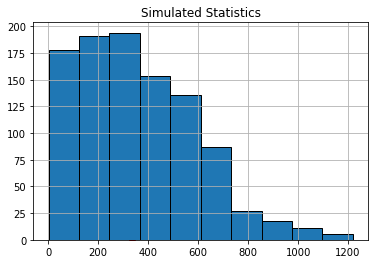

In [234]:
#Create a loop
num_repetitions = 1000
simulated_statistics = np.array([])

for i in np.arange(num_repetitions):
    simulated_statistics = np.append(simulated_statistics, simulation_and_statistic())
    
# Draw histogram
pd.DataFrame({"Simulated Statistics": simulated_statistics}).hist()
plt.scatter(observed_statistic, 0, color='red', s=30)

In [210]:
np.sum(simulated_statistics >= observed_statistic) / num_repetitions

0.46200000000000002

In [250]:
## Bootstrapping 
one_bootstrap_sample = navco_selected.sample(len(navco_selected), replace = True)

In [224]:
def one_bootstrap_mean(samp):
    one_bootstrap_sample = samp.sample(len(samp), replace = True)
    
    return np.mean(one_bootstrap_sample["fatalities_low"])

one_bootstrap_mean(navco_selected)

853.0934306569343

In [235]:
bootstrap_means = np.array([])
num_bootstraps = 1000

for i in np.arange(num_bootstraps):
    bootstrap_means = np.append(bootstrap_means, one_bootstrap_mean(navco_selected))

In [228]:
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

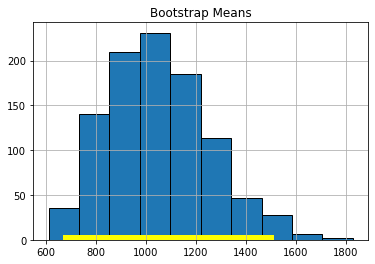

In [258]:
pd.DataFrame({"Bootstrap Means": bootstrap_means}).hist()
plt.plot([left, right], [0, 0], color='yellow', lw=10, zorder=1)

In [279]:
## Machine Learning 
repression_selected = navco[["camp_structure", "fatalities_low", "repression"]]

## Replace -99 to NAs
repression_selected = repression_selected.replace(-99, np.nan)

In [280]:
repression_selected["fatal_repression"] = repression_selected["repression"] == 3
repression_selected

,camp_structure,fatalities_low,repression,fatal_repression
0,1.0,0.0,3.0,True
1,1.0,0.0,3.0,True
2,1.0,200.0,3.0,True
3,0.0,1.0,3.0,True
4,0.0,1300.0,3.0,True
...,...,...,...,...
2712,1.0,NaN,3.0,True
2713,1.0,NaN,3.0,True
2714,1.0,NaN,3.0,True
2715,1.0,9.0,3.0,True


In [296]:
shuffled = repression_selected.sample(len(repression_selected)) 
shuffled = shuffled.dropna() # necessary because KNN does not handle missing values

rows_to_take = int(0.8 * len(shuffled))

train = shuffled.iloc[:rows_to_take]
test = shuffled.iloc[rows_to_take:]

In [300]:
#Fit the models
knn = KNeighborsClassifier(n_neighbors = 3)

predictors = train.drop(columns = "fatal_repression")
outcome = train["fatal_repression"]

knn.fit(X = predictors, y = outcome)


KNeighborsClassifier(n_neighbors=3)

In [301]:
threshold = 0.3
test_features = test.drop(columns = "fatal_repression")
knn_predicted = knn.predict_proba(test_features)[:,1] > threshold
knn_predicted

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [303]:
confusion_matrix(test["fatal_repression"], knn_predicted)

1.0

In [ ]:
accuracy_score(test["fatal_repression"], knn_predicted)